In [1]:
## import the packages / libraries
## BeautifulSoup library for reading html web pages
## pandas library for creating dataframe
## codecs library for reading the html file - data source with utf-8 format.
## requests library to fetch response / data from website source
## matplotlib library for plotting the graphs / visualizations

from bs4 import BeautifulSoup
import pandas as pd
import codecs
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
## define the variable and assign the website url to it
## that url can be used as variable within the requests.get method
#### Refrence: https://stackoverflow.com/questions/49283439/python-beautifulsoup-soup-find

url = 'https://en.wikipedia.org/wiki/COVID-19_testing#Testing_statistics_by_country'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>COVID-19 testing - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YDXjFIO3JjQUpPelUPL4hQAAABI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"COVID-19_testing","wgTitle":"COVID-19 testing","wgCurRevisionId":1008092300,"wgRevisionId":1008092300,"wgArticleId":63204759,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 German-language sources (de)","CS1: long volume value","Harv and Sfn no-target errors","CS1 Japanese-language sources (ja)","CS1 us

In [3]:
# find total number of 'table' elements present within the web page response
# 'wikitable' is the class of the tables consisting of required COVID-19 data. so, we are looking for these specific tables.


all_tables = soup.find_all('table')

all_wiki_tables = soup.find_all('table', {'class': 'wikitable'})

print(f'total number of tables are : {len(all_tables)}')
print(f'total number of wikitable tables are : {len(all_wiki_tables)}')
print(f'type of of wikitable tables are : {type(all_wiki_tables)}')

total number of tables are : 26
total number of wikitable tables are : 2
type of of wikitable tables are : <class 'bs4.element.ResultSet'>


### We can notice that there are 2 wikitables

In [4]:
# print data in all the tables with 'wikitable' class

print(all_wiki_tables)

[<table class="wikitable" style="float: right; margin-left:15px">
<caption>The location of sample collection impact on sensitivity for COVID-19 in 205 Wuhan patients<sup class="reference" id="cite_ref-Wang_1843–1844_134-1"><a href="#cite_note-Wang_1843–1844-134">[134]</a></sup>
</caption>
<tbody><tr>
<th>Samples source
</th>
<th>Positive rate
</th></tr>
<tr>
<td>Bronchoalveolar lavage fluid specimens
</td>
<td>93% (14/15)
</td></tr>
<tr>
<td>Sputum
</td>
<td>72% (75/104)
</td></tr>
<tr>
<td>Nasal swabs
</td>
<td>63% (5/8)
</td></tr>
<tr>
<td>Fibrobronchoscope brush biopsy
</td>
<td>46% (6/13)
</td></tr>
<tr>
<td>Pharyngeal swabs
</td>
<td>32% (126/398)
</td></tr>
<tr>
<td>Feces
</td>
<td>29% (44/153)
</td></tr>
<tr>
<td>Blood
</td>
<td>1% (3/307)
</td></tr></tbody></table>, <table class="wikitable plainrowheaders sortable collapsible expanded">
<caption><link href="mw-data:TemplateStyles:r992953826" rel="mw-deduplicated-inline-style"/><div class="navbar plainlinks hlist navbar-collapse

In [5]:
## print type of the all_wiki_tables variable

print(f'Type of all_wiki_tables : {type(all_wiki_tables)}')
print(f'Length of all_wiki_tables : {len(all_wiki_tables)}')

Type of all_wiki_tables : <class 'bs4.element.ResultSet'>
Length of all_wiki_tables : 2


### It appears the second table amongst the two wikitables is having the data we are looking for. So, in next steps we will read that table

In [6]:
## as we notice element type 'a' consists of the table names i.e. source names. [0] occurence of element 'a' has table names
## to find out the source names, we will use get_text() method
## get_text() method extracts the text from title field element

#table_names = [table.find_all('a').get_text() for table in all_wiki_tables[1]]

table_names = all_wiki_tables[1].find('a')

print(f'Names of the the wikitables currently extracted are : {table_names}')

Names of the the wikitables currently extracted are : <a href="/wiki/Template:COVID-19_testing_by_country" title="Template:COVID-19 testing by country"><abbr title="View this template">v</abbr></a>


In [7]:
## Looking at above data_table, it is ResultSet and appears like a list. [0] occurrence in data_table holds entire info.
## we need to segregate the data and table names using below steps.
## tbody element within the first wikitable - consists of sub element 'tr'. [0] occurrence of such data is explored further.
## The 'tr' element consists of 'td' elements further within, each of which consists of the table names. 
## we will be looking for the first 'tr' element i.e. recursive=False option.
## so, we will be retrieving those table names in this manner

#### at high level, describing the elements and some of the structures within them, for further understanding.
#### this will help in further processing and data, tables, headers and columns segregation
## <tbody>
##    <tr>
##      <td>  </td>
##      <td>  </td>
##    </tr>
##       <tr>
##         <th>    </th>
##         <th>    </th>
##       </tr>
##    </thead>
## </tbody>

###### Wikitable Data in current table is present in below format.. 
###### first column data within <th> </th> tags and remaining data columns within <td> </td> tags

## <tbody>
##       <tr>
##         <th>    </th>
##         <td>    </td>
##         <td>    </td>
##         ...
##         ...
##         <td>    </td>
##       </tr>
##    </thead>
## </tbody>

## Processing for extracting data and columns from the COVID-19 testing statistics Wikitable - "COVID-19 testing statistics by country"

In [8]:
## create an empty list to store the data within the 'tr' element. this data is in the form of multiple 'th' / 'td'elements.
## This extract will be used further to derive the column names
## For extracting the Column names within each of the GDP tables, we will be performing the steps - in two parts
## Below is the part, where we look through the [1] occurence of all_wiki_tables prepared earlier, which has the details.

tr_list = []

tr_list = [tr for tr in all_wiki_tables[1].find_all('tr')]

#for th in all_wiki_tables[-1]:
#    th_list.append(tr.find_all('th'))

print(tr_list)

[<tr>
<th>Country or region
</th>
<th>Date<sup class="reference" id="cite_ref-325"><a href="#cite_note-325">[a]</a></sup>
</th>
<th>Tested
</th>
<th>Units<sup class="reference" id="cite_ref-326"><a href="#cite_note-326">[b]</a></sup>
</th>
<th>Confirmed<br/>(cases)
</th>
<th>Confirmed /<br/>tested,<br/>%
</th>
<th>Tested /<br/>population,<br/>%
</th>
<th>Confirmed /<br/>population,<br/>%
</th>
<th class="unsortable"><abbr title="Reference(s)">Ref.</abbr>
</th></tr>, <tr>
<th scope="row"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/23px-Flag_of_Afghanistan.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/35px-Flag_of_Afghanistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/45px-Flag_of_Afghanistan.svg.png 2x" width="23"/></span> <a href=

### As we can notice, the first element - [0] occurrence in the 'tr_list' has the list of columns in the COVID-19 testing wiki table.

### We will be using this information to segregate the 'Headers'  i.e. column names

### [1] occurrence holds the actual data fields. we will be using it later on in the processing from tr_list.

In [9]:
## Below is the next part of this process, where we extract the actual Column names

## extracting the actual header names from the 'tr_list' data extracted in above step.
## the 'th' elements within are being used to extract the header names of the wikitable consisting of COVID-19 testing data
## getText() method extracts the text from title field element

th_list = [th.getText().strip() for th in tr_list[0].find_all('th')]

print(f'Column Names within the COVID-19 testing statistics tables are : {th_list}')

Column Names within the COVID-19 testing statistics tables are : ['Country or region', 'Date[a]', 'Tested', 'Units[b]', 'Confirmed(cases)', 'Confirmed\u2009/tested,%', 'Tested\u2009/population,%', 'Confirmed\u2009/population,%', 'Ref.']


In [10]:
## now extracting the actual data rows from the data part segregated above.
## 'td' elements are present within the each of the 'tr' elements. each such 'td' elements holds the data points within.
## So, we may need to write generator expression within another generator expression to be able to extract each data points.
## getText() method extracts the text from title field element

## It appears that the first column in the wikitable is present within 'th' tags / elements. It has Location - country names
## Rest of the data is present within regular 'td' tags / elements.

first_col_rows = [[th.getText().strip() for th in tr.find_all('th')] for tr in tr_list]

remaining_data_rows = [[td.getText().strip() for td in tr.find_all('td')] for tr in tr_list]

In [11]:
## Display the data elements within 'th' tags / elements - which are present within first column.
## This column has Location - Country name information.

first_col_rows

[['Country or region',
  'Date[a]',
  'Tested',
  'Units[b]',
  'Confirmed(cases)',
  'Confirmed\u2009/tested,%',
  'Tested\u2009/population,%',
  'Confirmed\u2009/population,%',
  'Ref.'],
 ['Afghanistan'],
 ['Albania'],
 ['Algeria'],
 ['Andorra'],
 ['Angola'],
 ['Antigua and Barbuda'],
 ['Argentina'],
 ['Armenia'],
 ['Australia'],
 ['Austria'],
 ['Azerbaijan'],
 ['Bahamas'],
 ['Bahrain'],
 ['Bangladesh'],
 ['Barbados'],
 ['Belarus'],
 ['Belgium'],
 ['Belize'],
 ['Benin'],
 ['Bhutan'],
 ['Bolivia'],
 ['Bosnia and Herzegovina'],
 ['Botswana'],
 ['Brazil'],
 ['Brunei'],
 ['Bulgaria'],
 ['Burkina Faso'],
 ['Burundi'],
 ['Cambodia'],
 ['Cameroon'],
 ['Canada'],
 ['Chad'],
 ['Chile'],
 ['China[c]'],
 ['Colombia'],
 ['Costa Rica'],
 ['Croatia'],
 ['Cuba'],
 ['Cyprus[d]'],
 ['Czechia'],
 ['Denmark[e]'],
 ['Djibouti'],
 ['Dominica'],
 ['Dominican Republic'],
 ['DR Congo'],
 ['Ecuador'],
 ['Egypt'],
 ['El Salvador'],
 ['Equatorial Guinea'],
 ['Estonia'],
 ['Eswatini'],
 ['Ethiopia'],
 ['Faroe 

In [12]:
## Display the data elements within 'td' tags / elements

remaining_data_rows

[[],
 ['17 Dec 2020',
  '154,767',
  'samples',
  '49,621',
  '32.1',
  '0.40',
  '0.13',
  '[325]'],
 ['18 Feb 2021',
  '428,654',
  'samples',
  '96,838',
  '22.6',
  '15.0',
  '3.4',
  '[326]'],
 ['2 Nov 2020',
  '230,553',
  'samples',
  '58,574',
  '25.4',
  '0.53',
  '0.13',
  '[327][328]'],
 ['15 Feb 2021',
  '152,578',
  'samples',
  '10,538',
  '6.9',
  '197',
  '13.6',
  '[329]'],
 ['19 Jan 2021',
  '339,634',
  'samples',
  '19,011',
  '5.6',
  '1.1',
  '0.061',
  '[330]'],
 ['22 Feb 2021', '13,065', 'samples', '614', '4.7', '13.6', '0.64', '[331]'],
 ['22 Feb 2021',
  '7,174,337',
  'samples',
  '2,069,751',
  '28.8',
  '15.8',
  '4.6',
  '[332]'],
 ['23 Feb 2021',
  '710,201',
  'samples',
  '170,672',
  '24.0',
  '24.1',
  '5.8',
  '[333]'],
 ['23 Feb 2021',
  '14,133,828',
  'samples',
  '28,937',
  '0.20',
  '56.3',
  '0.12',
  '[334]'],
 ['23 Feb 2021',
  '13,420,960',
  'samples',
  '444,531',
  '3.3',
  '151',
  '5.0',
  '[335]'],
 ['22 Feb 2021',
  '2,555,058',
  's

In [13]:
## print the the length of remaining data columns occurrences

print(len(remaining_data_rows))

174


In [14]:
## print the the length of first data columns occurrences. This column has Location - Country name information.

print(len(first_col_rows))

174


### As we can notice, the [0] occurrence and [-1] occurrence in both the above lists is not having valid data. So, we will be dropping those occurrence and creating new respective lists. Later on we will need to merge corresponding occurrences from both the lists to ensure that we get entire row information together

## Below processing steps can also be viewed as Data Cleaning / Data Wrangling steps

In [15]:
## dropping the [0] and [-1] occurrences to retain clean data information

clean_data_row_list = remaining_data_rows[1:-1]

In [16]:
## dropping the [0] and [-1] occurrences to retain clean data information

clean_first_column_list = first_col_rows[1:-1]

In [17]:
## As we can notice above, the list of remaining data columns has numeric values which are comma separated.
## This may intefer with the data split into multiple columns using ','. 
## So to avoid any potential issues in the next steps of data column formation, we are replacing ',' with '' so that
## we can have plain numeric values as a continuous data field 

## clean_data_row_list is a list of lists as we noticed earlier. So, using 2 'for' loops for data clean up

for d1 in clean_data_row_list:
    for i, d2 in enumerate(d1):
        d2 = d2.replace(",", "")
        d1[i] = d2

## Display the clean_data_row_list after clean up

clean_data_row_list

[['17 Dec 2020',
  '154767',
  'samples',
  '49621',
  '32.1',
  '0.40',
  '0.13',
  '[325]'],
 ['18 Feb 2021', '428654', 'samples', '96838', '22.6', '15.0', '3.4', '[326]'],
 ['2 Nov 2020',
  '230553',
  'samples',
  '58574',
  '25.4',
  '0.53',
  '0.13',
  '[327][328]'],
 ['15 Feb 2021', '152578', 'samples', '10538', '6.9', '197', '13.6', '[329]'],
 ['19 Jan 2021', '339634', 'samples', '19011', '5.6', '1.1', '0.061', '[330]'],
 ['22 Feb 2021', '13065', 'samples', '614', '4.7', '13.6', '0.64', '[331]'],
 ['22 Feb 2021',
  '7174337',
  'samples',
  '2069751',
  '28.8',
  '15.8',
  '4.6',
  '[332]'],
 ['23 Feb 2021',
  '710201',
  'samples',
  '170672',
  '24.0',
  '24.1',
  '5.8',
  '[333]'],
 ['23 Feb 2021',
  '14133828',
  'samples',
  '28937',
  '0.20',
  '56.3',
  '0.12',
  '[334]'],
 ['23 Feb 2021',
  '13420960',
  'samples',
  '444531',
  '3.3',
  '151',
  '5.0',
  '[335]'],
 ['22 Feb 2021',
  '2555058',
  'samples',
  '233201',
  '9.1',
  '25.8',
  '2.4',
  '[336]'],
 ['21 Feb 2

In [18]:
## display the lengths of cleaned up lists

len(clean_first_column_list), len(clean_data_row_list)

(172, 172)

In [19]:
## Display the list after cleaning out the unnecessary information

clean_first_column_list

[['Afghanistan'],
 ['Albania'],
 ['Algeria'],
 ['Andorra'],
 ['Angola'],
 ['Antigua and Barbuda'],
 ['Argentina'],
 ['Armenia'],
 ['Australia'],
 ['Austria'],
 ['Azerbaijan'],
 ['Bahamas'],
 ['Bahrain'],
 ['Bangladesh'],
 ['Barbados'],
 ['Belarus'],
 ['Belgium'],
 ['Belize'],
 ['Benin'],
 ['Bhutan'],
 ['Bolivia'],
 ['Bosnia and Herzegovina'],
 ['Botswana'],
 ['Brazil'],
 ['Brunei'],
 ['Bulgaria'],
 ['Burkina Faso'],
 ['Burundi'],
 ['Cambodia'],
 ['Cameroon'],
 ['Canada'],
 ['Chad'],
 ['Chile'],
 ['China[c]'],
 ['Colombia'],
 ['Costa Rica'],
 ['Croatia'],
 ['Cuba'],
 ['Cyprus[d]'],
 ['Czechia'],
 ['Denmark[e]'],
 ['Djibouti'],
 ['Dominica'],
 ['Dominican Republic'],
 ['DR Congo'],
 ['Ecuador'],
 ['Egypt'],
 ['El Salvador'],
 ['Equatorial Guinea'],
 ['Estonia'],
 ['Eswatini'],
 ['Ethiopia'],
 ['Faroe Islands'],
 ['Fiji'],
 ['Finland'],
 ['France[f][g]'],
 ['Gabon'],
 ['Gambia'],
 ['Georgia[h]'],
 ['Germany'],
 ['Ghana'],
 ['Greece'],
 ['Greenland'],
 ['Grenada'],
 ['Guatemala'],
 ['Guine

In [20]:
## As noticed above in the clean_first_column_list, some of the occurrences have "[]" notations with values/links within
## by comparing with original wiki page.
## Since we do not require those values in our data, we will clean them up using below logic.
## We first check whether "[" is present within a given occurrence.
## Then, split("[", 1) will help us delete any data after first such occurrence of "[" character and retain the clean data
## part in the respective occurrences.

for i in range(len(clean_first_column_list)):
    
    if "[" in clean_first_column_list[i][0]:
        x, y = clean_first_column_list[i][0].split("[", 1)
        print("2 values: ", x, y)
        clean_first_column_list[i][0] = x

2 values:  China c]
2 values:  Cyprus d]
2 values:  Denmark e]
2 values:  France f][g]
2 values:  Georgia h]
2 values:  Luxembourg i]
2 values:  Moldova j]
2 values:  Northern Cyprus k]
2 values:  Switzerland l]
2 values:  Taiwan m]


In [21]:
clean_first_column_list

[['Afghanistan'],
 ['Albania'],
 ['Algeria'],
 ['Andorra'],
 ['Angola'],
 ['Antigua and Barbuda'],
 ['Argentina'],
 ['Armenia'],
 ['Australia'],
 ['Austria'],
 ['Azerbaijan'],
 ['Bahamas'],
 ['Bahrain'],
 ['Bangladesh'],
 ['Barbados'],
 ['Belarus'],
 ['Belgium'],
 ['Belize'],
 ['Benin'],
 ['Bhutan'],
 ['Bolivia'],
 ['Bosnia and Herzegovina'],
 ['Botswana'],
 ['Brazil'],
 ['Brunei'],
 ['Bulgaria'],
 ['Burkina Faso'],
 ['Burundi'],
 ['Cambodia'],
 ['Cameroon'],
 ['Canada'],
 ['Chad'],
 ['Chile'],
 ['China'],
 ['Colombia'],
 ['Costa Rica'],
 ['Croatia'],
 ['Cuba'],
 ['Cyprus'],
 ['Czechia'],
 ['Denmark'],
 ['Djibouti'],
 ['Dominica'],
 ['Dominican Republic'],
 ['DR Congo'],
 ['Ecuador'],
 ['Egypt'],
 ['El Salvador'],
 ['Equatorial Guinea'],
 ['Estonia'],
 ['Eswatini'],
 ['Ethiopia'],
 ['Faroe Islands'],
 ['Fiji'],
 ['Finland'],
 ['France'],
 ['Gabon'],
 ['Gambia'],
 ['Georgia'],
 ['Germany'],
 ['Ghana'],
 ['Greece'],
 ['Greenland'],
 ['Grenada'],
 ['Guatemala'],
 ['Guinea'],
 ['Guinea-Bis

In [22]:
## clean_first_column_list and clean_data_row are both list of lists.
## So, performing 'zip()' operation to be able to separate out each of the inner occurrence lists from these individual lists.
## These inner occurrences from each lists are given back as strings vz. fst_col and clean_data_row.
## Then, ','.join() operation helps combine the two strings, which are being combined with '+' operator to ensure only 1
## string argument is given to the join() function.

## This process will form a new list of strings as separate occurrences, with each occurrence representing a data row
## from the wikitable on the page. Currently, each of these string occurrences have ',' present within them.
## We will further use ',' as a separator value to extract each corresponding column data values

new_combined_data_list = [','.join(fst_col + clean_data_row) for fst_col, clean_data_row in zip(clean_first_column_list, clean_data_row_list)]

In [23]:
## Display the new combined list

new_combined_data_list

['Afghanistan,17 Dec 2020,154767,samples,49621,32.1,0.40,0.13,[325]',
 'Albania,18 Feb 2021,428654,samples,96838,22.6,15.0,3.4,[326]',
 'Algeria,2 Nov 2020,230553,samples,58574,25.4,0.53,0.13,[327][328]',
 'Andorra,15 Feb 2021,152578,samples,10538,6.9,197,13.6,[329]',
 'Angola,19 Jan 2021,339634,samples,19011,5.6,1.1,0.061,[330]',
 'Antigua and Barbuda,22 Feb 2021,13065,samples,614,4.7,13.6,0.64,[331]',
 'Argentina,22 Feb 2021,7174337,samples,2069751,28.8,15.8,4.6,[332]',
 'Armenia,23 Feb 2021,710201,samples,170672,24.0,24.1,5.8,[333]',
 'Australia,23 Feb 2021,14133828,samples,28937,0.20,56.3,0.12,[334]',
 'Austria,23 Feb 2021,13420960,samples,444531,3.3,151,5.0,[335]',
 'Azerbaijan,22 Feb 2021,2555058,samples,233201,9.1,25.8,2.4,[336]',
 'Bahamas,21 Feb 2021,66595,samples,8471,12.7,17.3,2.2,[337]',
 'Bahrain,22 Feb 2021,3008379,samples,118540,3.9,192,7.6,[338]',
 'Bangladesh,19 Feb 2021,3922489,samples,542674,13.8,2.4,0.33,[339]',
 'Barbados,21 Feb 2021,121121,samples,2791,2.3,42.2,0.

## Creating DataFrame from the raw data prepared above

In [24]:
## Create a DataFrame from the combined list generated above. The list consists of occurrences which are of 'String' type.
## Split each of the occurrence strings in this list using ',' so that we get each column data separately.
## We will use the th_list created earlier as column names to begin with.

new_temp_df = pd.DataFrame((x.split(',') for x in new_combined_data_list), columns = th_list)

In [25]:
## Display the new_temp_df to ensure the DataFrame is created correctly

new_temp_df

,Country or region,Date[a],Tested,Units[b],Confirmed(cases),"Confirmed /tested,%","Tested /population,%","Confirmed /population,%",Ref.
0,Afghanistan,17 Dec 2020,154767,samples,49621,32.1,0.40,0.13,[325]
1,Albania,18 Feb 2021,428654,samples,96838,22.6,15.0,3.4,[326]
2,Algeria,2 Nov 2020,230553,samples,58574,25.4,0.53,0.13,[327][328]
3,Andorra,15 Feb 2021,152578,samples,10538,6.9,197,13.6,[329]
4,Angola,19 Jan 2021,339634,samples,19011,5.6,1.1,0.061,[330]
...,...,...,...,...,...,...,...,...,...
167,Uzbekistan,14 Jul 2020,1400000,samples,13872,0.99,4.1,0.041,[507]
168,Venezuela,21 Feb 2021,2844236,samples,136068,4.8,9.8,0.47,[508]
169,Vietnam,15 Oct 2020,1260799,samples,1124,0.089,1.3,0.0011,[509]
170,Zambia,23 Feb 2021,1061271,samples,75582,7.1,6.1,0.44,[510]


In [26]:
## Defined a new list of column headers below to be used later on.

new_temp_headers = ['CTRY_Name', 'Date', 'Total_Tests', 'Units', 'Confirmed_Cases', 'Pct', 'Tested_per_Mn', 'Confirmed_per_Mn', 'Ref']

In [27]:
## Display the list of existing columns

new_temp_df.columns

Index(['Country or region', 'Date[a]', 'Tested', 'Units[b]',
       'Confirmed(cases)', 'Confirmed /tested,%', 'Tested /population,%',
       'Confirmed /population,%', 'Ref.'],
      dtype='object')

## Renaming the column names - assigning the new headers / column names

In [28]:
## Assign the new column names to this dataframe

new_temp_df.columns = new_temp_headers

In [29]:
## Display initial part of the data to ensure the new column names assigned ae correct

new_temp_df.head()

,CTRY_Name,Date,Total_Tests,Units,Confirmed_Cases,Pct,Tested_per_Mn,Confirmed_per_Mn,Ref
0,Afghanistan,17 Dec 2020,154767,samples,49621,32.1,0.40,0.13,[325]
1,Albania,18 Feb 2021,428654,samples,96838,22.6,15.0,3.4,[326]
2,Algeria,2 Nov 2020,230553,samples,58574,25.4,0.53,0.13,[327][328]
3,Andorra,15 Feb 2021,152578,samples,10538,6.9,197,13.6,[329]
4,Angola,19 Jan 2021,339634,samples,19011,5.6,1.1,0.061,[330]


# Find out Country Name to Country Code conversion table from web. Use that information and add it as a new column for this dataframe. The Country Code field will be used in the overall project work as a common field i.e. as a Key to join the records from csv data, HTML data and API data

In [30]:
## https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements

## Copied the wikitable information in a Microsoft Excel file and stored on local machine.
## We will be using this table information to add Alphabetic - 2 byte Country code to above COVID-19 Testing data DataFrame.

In [31]:
## Read the ISO Country names and country codes list stored in the excel.

ctry_df_tmp = pd.read_excel("Country Names and Codes List.xlsx")

In [32]:
## Display initial few records from the Country Name / Country code list

ctry_df_tmp.head()

,Code,Country_name,Year,ccTLD,ISO 3166-2,Notes
0,AD,Andorra,1974.0,.ad,ISO 3166-2:AD,NaN
1,AE,United Arab Emirates,1974.0,.ae,ISO 3166-2:AE,NaN
2,AF,Afghanistan,1974.0,.af,ISO 3166-2:AF,NaN
3,AG,Antigua and Barbuda,1974.0,.ag,ISO 3166-2:AG,NaN
4,AI,Anguilla,1985.0,.ai,ISO 3166-2:AI,AI previously represented French Afars and Issas


## Creating a subset of data for ease of use in the processing later on

In [33]:
## Define the list of columns required from this DataFrame

ctry_df_new_cols = ['Code', 'Country_name']

In [34]:
## Select the list of columns required from this DataFrame

ctry_df = ctry_df_tmp[ctry_df_new_cols]

In [35]:
## Display the Country Code and Country Name DataFrame

ctry_df

,Code,Country_name
0,AD,Andorra
1,AE,United Arab Emirates
2,AF,Afghanistan
3,AG,Antigua and Barbuda
4,AI,Anguilla
...,...,...
261,NaN,NaN
262,YT,Mayotte
263,ZA,South Africa
264,ZM,Zambia


## Renaming the column names - assigning the new headers / column names

In [36]:
ctry_df.columns = ['CTRY_CD', 'Country_name']

## We can notice that record for 'US' has CTRY_Name column value in new_temp_df as 'United States' whereas Country_name value in ctry_df is 'United States of America'.

## So, we will update the value in CTRY_Name column value in new_temp_df to maintain standards with ISO standards

### Apparently, there still are 22 such entries where CTRY_Name values in new_temp_df are not in Sync with ISO Country_name column. 

### So, I corrected as many number of entries as possible.

In [37]:
## Updating the CTRY_Name value in new_temp_df to be in Sync with ISO Country names

new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'United States'] = 'United States of America'

In [38]:
## Updating the CTRY_Name value in new_temp_df to be in Sync with ISO Country names for some more entries

new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Moldova'] = 'Moldova, Republic of'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Saint Vincent'] = 'Saint Vincent and the Grenadines'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'DR Congo'] = 'Congo, Democratic Republic of the'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'United Kingdom'] = 'United Kingdom of Great Britain and Northern Ireland'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Brunei'] = 'Brunei Darussalam'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Laos'] = "Lao People's Democratic Republic"
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Venezuela'] = 'Venezuela (Bolivarian Republic of)'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Tanzania'] = 'Tanzania, United Republic of'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'South Korea'] = 'Korea, Republic of'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'North Korea'] = "Korea (Democratic People's Republic of)"
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Russia'] = 'Russian Federation'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Vietnam'] = 'Viet Nam'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Taiwan'] = 'Taiwan, Province of China'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Bolivia'] = 'Bolivia (Plurinational State of)'
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Ivory Coast'] = "Côte d'Ivoire"
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Iran'] = "Iran (Islamic Republic of)"
new_temp_df.CTRY_Name[new_temp_df.CTRY_Name == 'Palestine'] = "Palestine, State of"

In [39]:
## Performing a 'LEFT' join to ensure all the data from COVID-19 Testing Dataframe is retained as is.
## CTRY_CD column from ctry_df will be added to the new_temp_df along with Country_Name column

result = pd.merge(new_temp_df, ctry_df, how="left", left_on='CTRY_Name', right_on='Country_name')

In [40]:
## Display the result to ensure the Country Name update for 'US' has worked correctly

result[result.CTRY_Name == 'United States of America']

,CTRY_Name,Date,Total_Tests,Units,Confirmed_Cases,Pct,Tested_per_Mn,Confirmed_per_Mn,Ref,CTRY_CD,Country_name
165,United States of America,23 Feb 2021,346469862,samples,28000689,8.1,105,8.5,[505],US,United States of America


### From the above dataframe, we will be retaining columns like Location, Tested, Confirmed(cases), %, Tested/millionpeople and Confirmed/millionpeople.

### We can drop the columns like Date, Units, Pct and Ref

In [41]:
## list out the columns we need to use in the further part of the project and it will be used to create subset dataframe.
## these names will be used to further renamed to the new column names

## 1) We are Not looking to use the Dates columns named : 'Date', since we will only be using cumulative count values for 
##    further data preparation processsing and visualizations
## 2) 'Units' - contains samples / cases as indicator, which can be ignored, since we will not be needing it for analysis
## 3) 'Ref' - wikipedia references column field can be ignored since we will not be needing it for analysis
## 4) We will be retaining below 5 columns in the analysis going forward.
## ==> CTRY_Name : Country Name level information.
## ==> Total_Tests : Total number of COVID-19 tests performed in the respective countries
## ==> Confirmed_Cases : Total number of COVID-19 positive test cases recorded in the respective country
## ==> Pct : Confirmed cases as a Percentage of the Total number of tests performed
## ==> Tested/Million : Number of COVID-19 tests performed per million people population of respective country
## ==> Confirmed/Million : Number of COVID-19 positive cases per million people population of respective country
## ==> CTRY_CD : consisting of ISO alpha-2 country codes columns will be used going forward


cols = ['CTRY_CD', 'CTRY_Name', 'Total_Tests', 'Confirmed_Cases', 'Pct', 'Tested/Million', 'Confirmed/Million']

# Format Data into more readable format by selecting a subset of columns.
## This will ensure that we keep only the required data for further data preparation / visualizations

In [42]:
## Select a subset of columns from the DataFrame. Only these columns will be used for further analysis / visualization

html_df = result[['CTRY_CD', 'CTRY_Name', 'Total_Tests', 'Confirmed_Cases', 'Pct', 'Tested_per_Mn', 'Confirmed_per_Mn']]

# Replace Headers / Column names with shorter meaningful names

In [43]:
## Replace the column names with newly defined names above

html_df.columns = cols

In [44]:
## Display the html_df.
## This will ensure we have well formatted data and the minimal amount of required data columns are carried forward

html_df

,CTRY_CD,CTRY_Name,Total_Tests,Confirmed_Cases,Pct,Tested/Million,Confirmed/Million
0,AF,Afghanistan,154767,49621,32.1,0.40,0.13
1,AL,Albania,428654,96838,22.6,15.0,3.4
2,DZ,Algeria,230553,58574,25.4,0.53,0.13
3,AD,Andorra,152578,10538,6.9,197,13.6
4,AO,Angola,339634,19011,5.6,1.1,0.061
...,...,...,...,...,...,...,...
167,UZ,Uzbekistan,1400000,13872,0.99,4.1,0.041
168,VE,Venezuela (Bolivarian Republic of),2844236,136068,4.8,9.8,0.47
169,VN,Viet Nam,1260799,1124,0.089,1.3,0.0011
170,ZM,Zambia,1061271,75582,7.1,6.1,0.44


# Identify presence of bad data / NaN values and drop the values records

In [45]:
## we will check if there are any null values present in the columns which we have selected for further analysis

print(f'Number of Null values in CTRY_CD is : {html_df.CTRY_CD.isnull().sum()}')
print(f'Number of Null values in CTRY_Name is : {html_df.CTRY_Name.isnull().sum()}')
print(f'Number of Null values in Total_Tests is : {html_df.Total_Tests.isnull().sum()}')
print(f'Number of Null values in Confirmed_Cases is : {html_df.Confirmed_Cases.isnull().sum()}')
print(f'Number of Null values in Pct is : {html_df.Pct.isnull().sum()}')
print(f"Number of Null values in Tested/Million is : {html_df['Tested/Million'].isnull().sum()}")
print(f"Number of Null values in Confirmed/Million is : {html_df['Confirmed/Million'].isnull().sum()}")

Number of Null values in CTRY_CD is : 3
Number of Null values in CTRY_Name is : 0
Number of Null values in Total_Tests is : 0
Number of Null values in Confirmed_Cases is : 0
Number of Null values in Pct is : 0
Number of Null values in Tested/Million is : 0
Number of Null values in Confirmed/Million is : 0


In [46]:
### Display which CTRY_CD values are null

html_df[html_df.CTRY_CD.isnull()]

,CTRY_CD,CTRY_Name,Total_Tests,Confirmed_Cases,Pct,Tested/Million,Confirmed/Million
85,NaN,Kosovo,291847,67008,23.0,16.1,3.7
111,NaN,Namibia,295402,37896,12.8,10.8,1.4
120,NaN,Northern Cyprus,510078,3232,0.63,156,0.99


#### Looking at above, we can notice that CTRY_CD column appears to have NaN values.

#### The reason for NaN / missing values is that we were unable all the ISO Country names in the DataFrame, due to which the join did not yield the accurate matching outcome as CTRY_CD values. Didn't find country name Kosovo in ISO list.

#### So, We may have to drop these values.

In [47]:
## Drop the records with NaN / missing CTRY_CD values. 
## For analysis / visualization purpose, we will be looking at top 5 - 10 highly affected by COVID countries.
## The above mentioned records do not fall into the top 20 numbers, for Total_Tests and Confirmed_Cases

html_df = html_df.dropna()

# Find if any duplicate rows present in the data frame

In [48]:
## Checking if there are any duplicate values within the dataframe, at a row level

duplicate_rows_df = html_df[html_df.duplicated()]

In [49]:
## Checking how many duplicate rows found

duplicate_rows_df.shape

(0, 7)

### It appears that there are no duplicate rows

# Remove blanks / spaces around text column values

In [50]:
## Data cleaning step to ensure there are no leading or training spaces around Text value columns 
## CTRY_CD and CTRY_Name are those columns with Text values.

html_df['CTRY_CD'] = html_df['CTRY_CD'].str.strip()
html_df['CTRY_Name'] = html_df['CTRY_Name'].str.strip()

In [51]:
## Check the size of cleaned up html_df afte having dropped 4 records with missing ISO country code

html_df.shape

(169, 7)

## Ensure numeric columns like Total_Tests and Confirmed_Cases, Pct, Tested/Million and Confirmed/Million are indeed being iterpreted as numeric values. 

## If not, then convert them to numeric prior to further processing. Since, we will be sorting the data based on values in some of these column

In [52]:
## using dtypes function to check on the data types of each column

html_df.dtypes

CTRY_CD              object
CTRY_Name            object
Total_Tests          object
Confirmed_Cases      object
Pct                  object
Tested/Million       object
Confirmed/Million    object
dtype: object

### Apparently, the numeric columns are all being interpreted as objects rather than integers or floats as needed. So, we will be performing the following conversions to numeric

In [53]:
## converting the data types of required columns using apply() and pd.to_numeric() functions. This will further help in Data sorting at a later stages

html_df[['Total_Tests', 'Confirmed_Cases', 'Pct', 'Tested/Million', 'Confirmed/Million']] = html_df[['Total_Tests', 'Confirmed_Cases', 'Pct', 'Tested/Million', 'Confirmed/Million']].apply(pd.to_numeric)

In [54]:
## Display the data types of the columns after the conversion to numeric

html_df.dtypes

CTRY_CD               object
CTRY_Name             object
Total_Tests            int64
Confirmed_Cases        int64
Pct                  float64
Tested/Million       float64
Confirmed/Million    float64
dtype: object

# Sort the Dataframe in descending order, based on Total_Tests performed.

## We will be using top 10 rows by Total_Tests counts to display on the graphs

In [55]:
## create a sorted DataFrame in Descending order of values in Total_Tests column

sorted_total_tests_df = html_df.infer_objects().sort_values('Total_Tests', ascending=False)

In [56]:
## Display the initial 10 records from the sorted Dataframe. These will be displayed in plot.

sorted_total_tests_df.head(10)

,CTRY_CD,CTRY_Name,Total_Tests,Confirmed_Cases,Pct,Tested/Million,Confirmed/Million
165,US,United States of America,346469862,28000689,8.100,105.0,8.5000
72,IN,India,212230431,11016434,5.200,15.4,0.8000
33,CN,China,160000000,87655,0.055,11.1,0.0061
134,RU,Russian Federation,109638248,4189153,3.800,74.7,2.9000
164,GB,United Kingdom of Great Britain and Northern I...,86272167,4126150,4.800,128.0,6.1000
55,FR,France,51383765,3629891,7.100,78.7,5.6000
59,DE,Germany,42872730,2350399,5.500,51.1,2.8000
78,IT,Italy,38533461,2832162,7.300,63.8,4.7000
149,ES,Spain,38491517,3121687,8.100,82.4,6.7000
160,TR,Turkey,32436998,2646526,8.200,39.0,3.2000


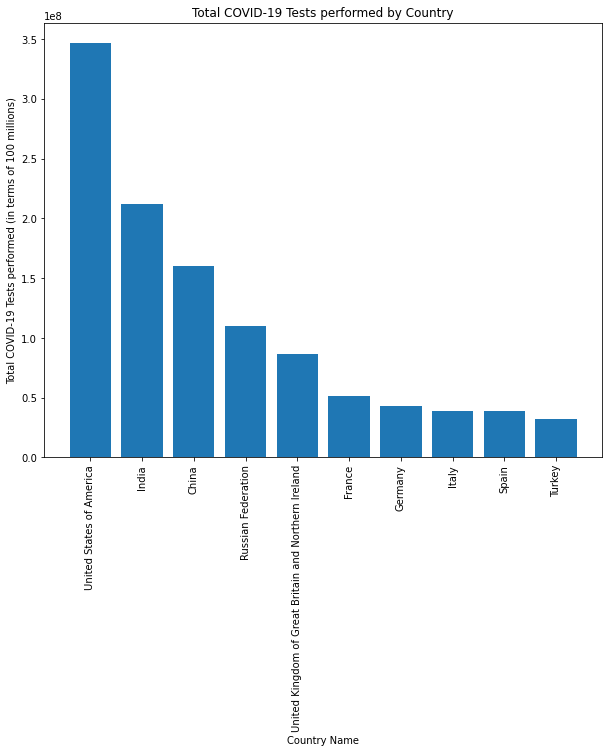

In [57]:
## plot the Country Name vs Total Covid-19 Tests performed Counts bar graph using matplotlib
## setting the appropriate title and labels for the plot. figure size helps draw larger size plots with clear information.

plt.figure(figsize=(10, 8))
plt.bar(sorted_total_tests_df.CTRY_Name[:10], sorted_total_tests_df.Total_Tests[:10])
plt.xlabel('Country Name')
plt.xticks(rotation=90)
plt.ylabel('Total COVID-19 Tests performed (in terms of 100 millions)')
plt.title('Total COVID-19 Tests performed by Country')
plt.show()

## Looking at the above bar charts, it appears that Top 5 of the Countries Performing most COVID-19 Tests are:

#### 1) United States of America
#### 2) India
#### 3) China
#### 4) Russia
#### 5) United Kingdom

# Sort the Dataframe in descending order, based on Confirmed_Cases performed.

## We will be using top 15 rows by Confirmed_Cases counts to display on the graphs

In [58]:
## create a sorted DataFrame in Descending order of values in Confirmed_Cases column

sorted_confirmed_cases_df = html_df.sort_values('Confirmed_Cases', ascending=False)

In [59]:
## Display the initial 15 records from the sorted Dataframe. These will be displayed in plot.

sorted_confirmed_cases_df.head(15)

,CTRY_CD,CTRY_Name,Total_Tests,Confirmed_Cases,Pct,Tested/Million,Confirmed/Million
165,US,United States of America,346469862,28000689,8.1,105.0,8.5
72,IN,India,212230431,11016434,5.2,15.4,0.8
23,BR,Brazil,23561497,10081676,42.8,11.2,4.8
134,RU,Russian Federation,109638248,4189153,3.8,74.7,2.9
164,GB,United Kingdom of Great Britain and Northern I...,86272167,4126150,4.8,128.0,6.1
55,FR,France,51383765,3629891,7.1,78.7,5.6
149,ES,Spain,38491517,3121687,8.1,82.4,6.7
78,IT,Italy,38533461,2832162,7.3,63.8,4.7
160,TR,Turkey,32436998,2646526,8.2,39.0,3.2
59,DE,Germany,42872730,2350399,5.5,51.1,2.8


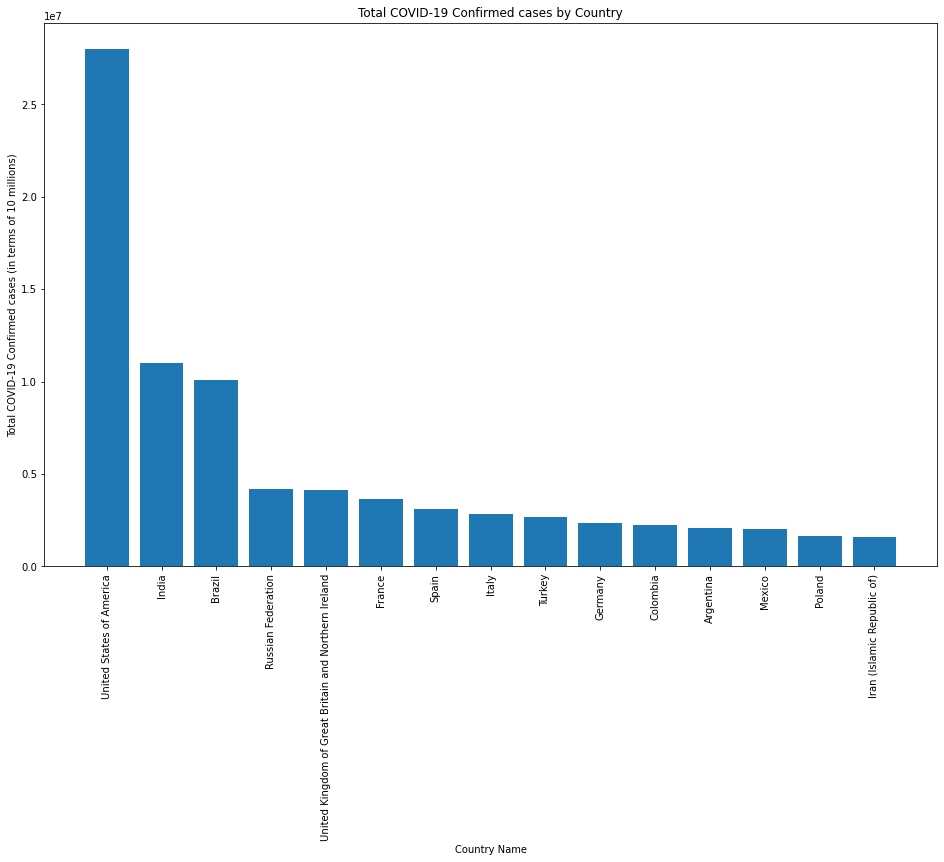

In [60]:
## plot the Country Name vs Total Covid-19 Tests performed Counts bar graph using matplotlib
## setting the appropriate title and labels for the plot. figure size helps draw larger size plots with clear information.

plt.figure(figsize=(16, 10))
plt.bar(sorted_confirmed_cases_df.CTRY_Name[:15], sorted_confirmed_cases_df.Confirmed_Cases[:15])
plt.xlabel('Country Name')
plt.xticks(rotation=90)
plt.ylabel('Total COVID-19 Confirmed cases (in terms of 10 millions)')
plt.title('Total COVID-19 Confirmed cases by Country')
plt.show()

## Looking at the above bar charts, it appears that Top 5 of the Countries most affected by COVID-19 are:

#### 1) United States of America
#### 2) India
#### 3) Brazil
#### 4) Russia
#### 5) United Kingdom

# Copy the the html_df DataFrame, which has the cleaned up data, into csv. This csv file will be be used in the final milestone of the project

In [61]:
## write the COVID-19 DataFrame in csv

html_df.to_csv("Covid_html_data.csv", index=False)